# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import geopandas as gpd

df=pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

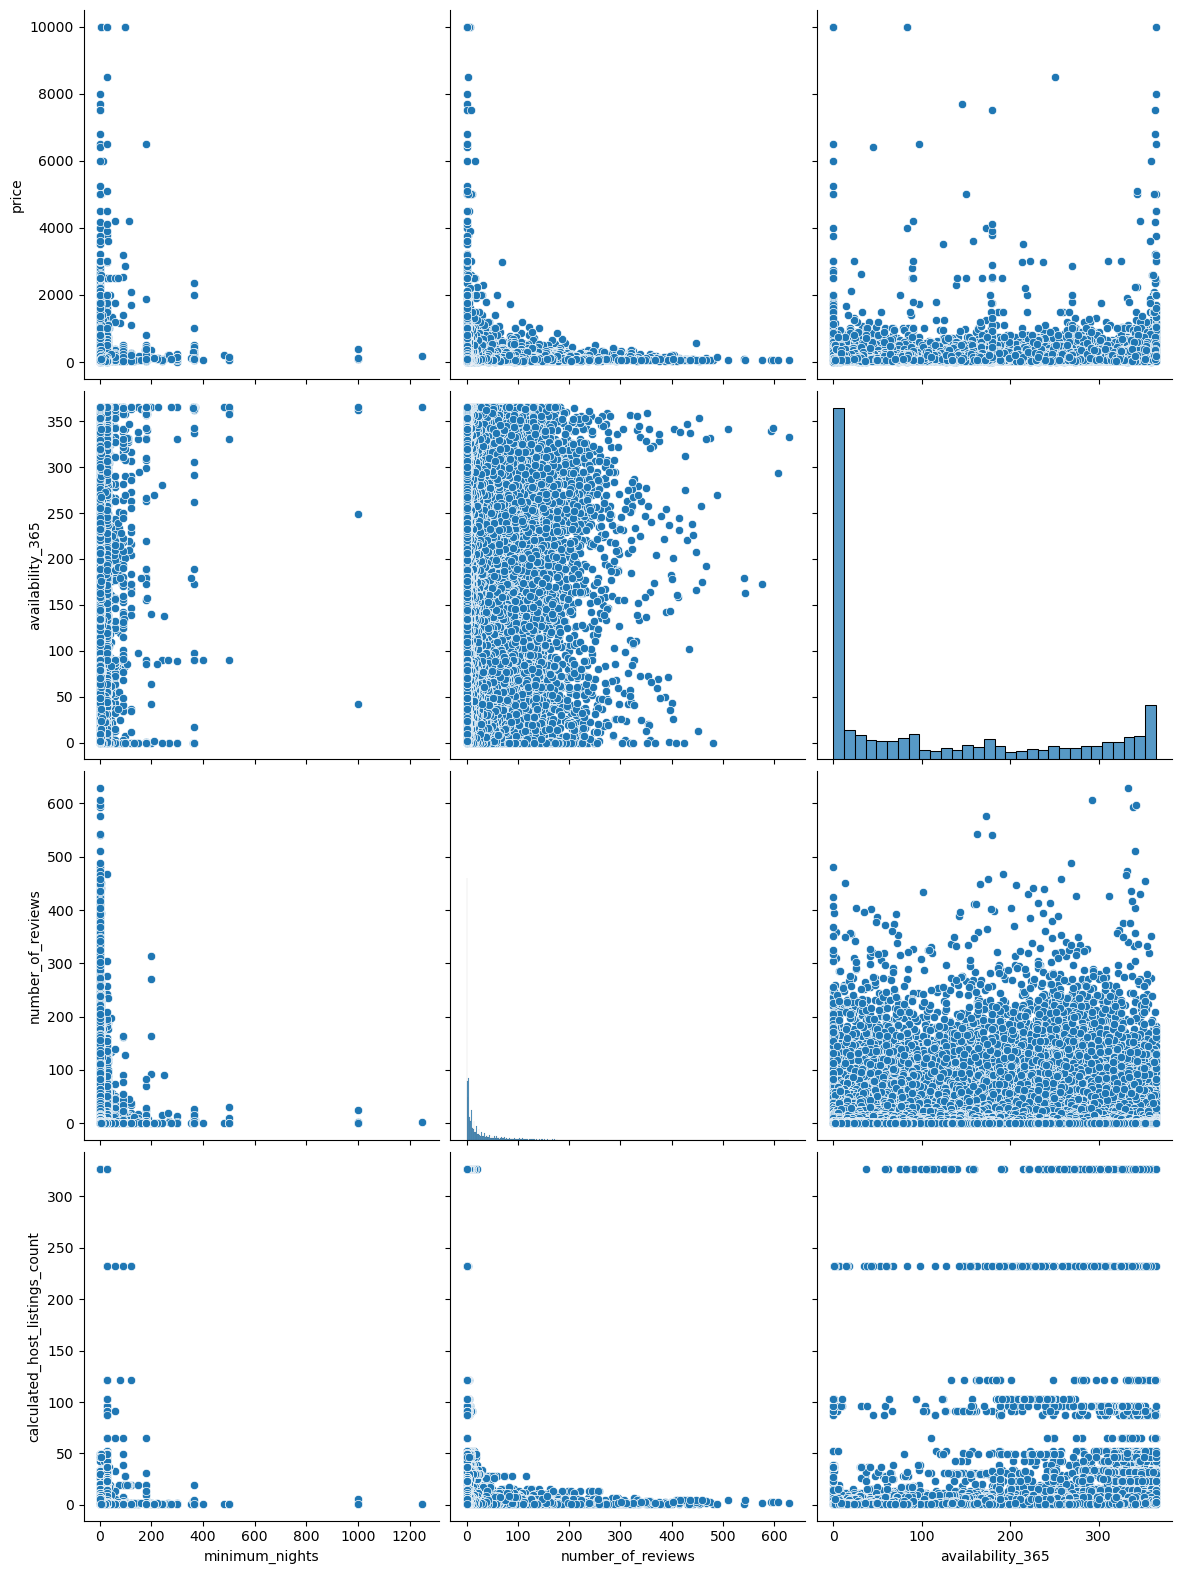

In [82]:
sns.pairplot(df, x_vars=['minimum_nights','number_of_reviews','availability_365'],
                y_vars=['price','availability_365','number_of_reviews','calculated_host_listings_count'], height=4,aspect=1, kind='scatter')
plt.show()

C:\Users\kathr\AppData\Local\Temp\ipykernel_13944\315718611.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(columns=["id","host_id","latitude","longitude"]).corr(), cmap="BuPu", annot = True,fmt=".2f")


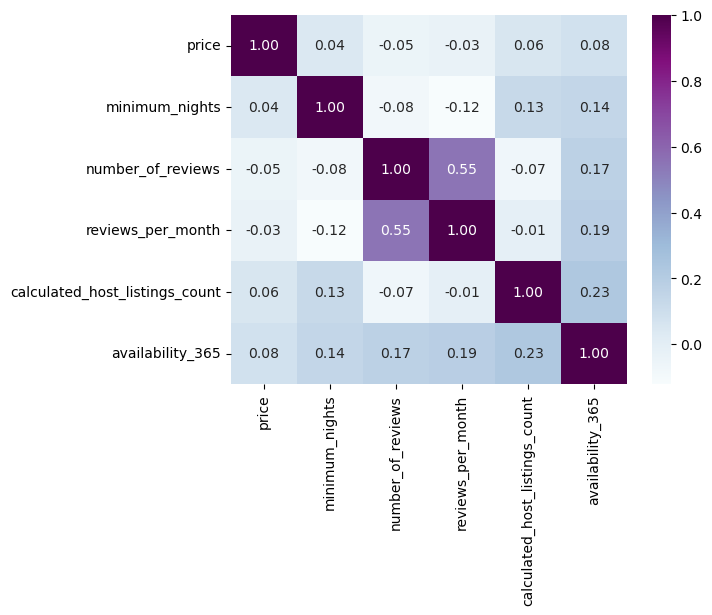

In [57]:

sns.heatmap(df.drop(columns=["id","host_id","latitude","longitude"]).corr(), cmap="BuPu", annot = True,fmt=".2f")
plt.show()


## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [65]:
X=df['availability_365']
y=df['calculated_host_listings_count']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                            test_size = 0.3, random_state = 100)

In [67]:
X_train.head()

5892       0
9517       0
19234      0
9448     188
38759    280
Name: availability_365, dtype: int64

In [68]:
y_train.head()

5892       1
9517       1
19234      2
9448       1
38759    232
Name: calculated_host_listings_count, dtype: int64

In [69]:
X_test.head()

41320     29
12273      0
33301      0
24371      0
35479    310
Name: availability_365, dtype: int64

In [70]:
y_test.head()

41320    4
12273    1
33301    2
24371    1
35479    2
Name: calculated_host_listings_count, dtype: int64

In [71]:
# Step 3 is to build the model. Remember to import any libraries you may need
import statsmodels.api as sm

#adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

#fitting the regression line using 'OLS' regression function - model now lives in the variable 'lr'
lr = sm.OLS(y_train, X_train_sm).fit()

#printing the parameters
lr.params


const               0.785379
availability_365    0.056110
dtype: float64

In [72]:
#calculate r2
lr.rsquared

0.05040288941281834

## Error Terms

Finally, plot your error terms!

C:\Users\kathr\AppData\Local\Temp\ipykernel_13944\1252877554.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


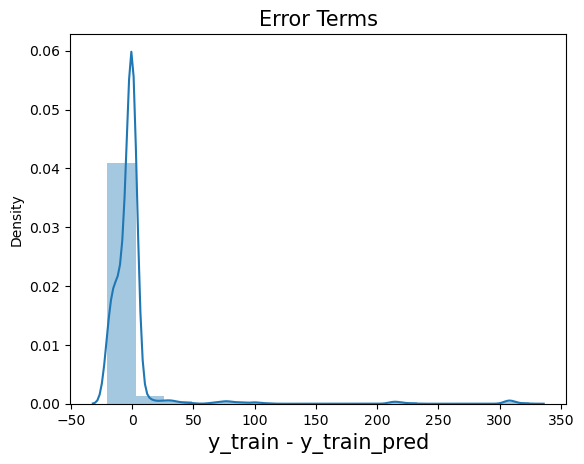

In [83]:
# Step 4 is to perform residual analysis

#Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

#Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

#plot data
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

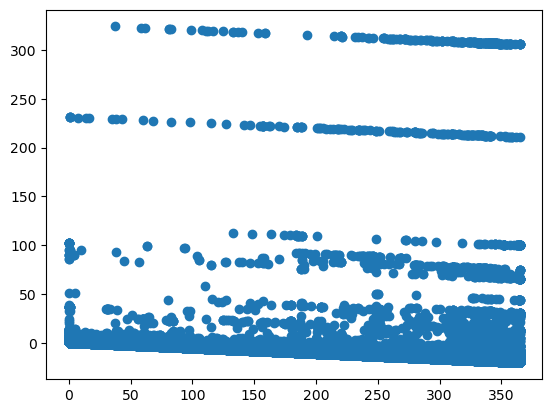

In [54]:
#Looking for any patterns in the residuals
plt.scatter(X_train, res)
plt.show()

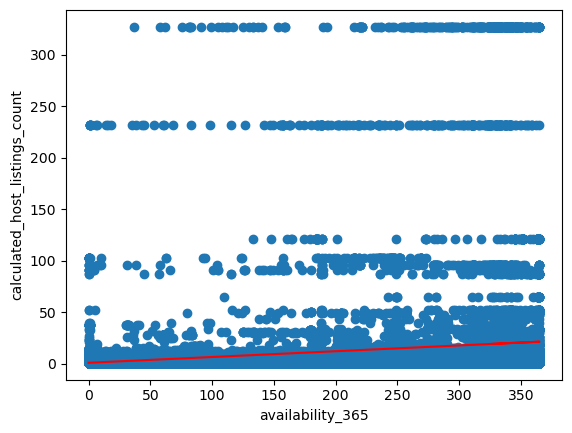

In [85]:
plt.scatter(X,y)
plt.plot(X_train,y_train_pred,color="r")
plt.xlabel('availability_365')
plt.ylabel('calculated_host_listings_count')
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.0504
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? The relationship between x and y is not linear, thus the linear regression model was not particularly effective.
3. Was your plot of the error terms a bell curve? No it wasn't